# #1.기술 통계 분석 + 그래프_와인 품질 등급 예측하기

In [ ]:
#1. 데이터 준비
#다운로드한 CSV 파일 정리하기
import pandas as pd

In [37]:
red_df = pd.read_csv('C:/Users/rou59/주피터노트북/winequality-red.csv', sep = ';', header = 0)

In [38]:
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [39]:
white_df = pd.read_csv('C:/Users/rou59/주피터노트북/winequality-white.csv', sep = ';', header = 0)

In [40]:
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [42]:
red_df.to_csv('C:/Users/rou59/주피터노트북/winequality-red.csv2', index = False)

In [43]:
white_df.to_csv('C:/Users/rou59/주피터노트북/winequality-white.csv2', index = False)

In [44]:
#2. 데이터 병합하기

red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
red_df.insert(0, column = 'type', value = 'red')  #데이터 프레임에 'type'열 삽입
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
red_df.shape

(1599, 13)

In [47]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [49]:
white_df.insert(0, column = 'type', value = 'white')    #데이터 프레임에 'type'열 삽입
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [52]:
white_df.shape

(4898, 13)

In [53]:
wine = pd.concat([red_df, white_df])  #데이터 프레임 병합
wine.shape

(6497, 13)

In [55]:
wine.to_csv('C:/Users/rou59/주피터노트북/wine.csv', index = False)  #csv 파일로 저장

In [56]:
#3. 데이터 탐색
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


In [57]:
#기술 통계 구하기
wine.columns = wine.columns.str.replace(' ', '_')  #공백 제거
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
wine.describe()  #통계량 요약

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [60]:
sorted(wine.quality.unique())  #와인 품질 등급 확인

[3, 4, 5, 6, 7, 8, 9]

In [61]:
wine.quality.value_counts()  #속성값의 빈도수 확인 최대는 6등급 2836개 최소는 9등급 5개

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [62]:
#4. 데이터 모델링
wine.groupby('type')['quality'].describe()  #type을 기준으로 그룹을 나눈뒤 quality 속성을 기준으로 통계 구하기

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [64]:
wine.groupby('type')['quality'].mean()  #평균

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [65]:
wine.groupby('type')['quality'].std()  #표준편차

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

In [66]:
wine.groupby('type')['quality'].agg(['mean', 'std'])  #평균과 표준편차 묶어서

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


In [82]:
#t-검정과 회귀 분석으로 그룹 비교하기
from scipy import stats
from statsmodels.formula.api import ols, glm

In [101]:
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']  #레드 와인 샘플의 quality 값만 찾아서 저장

In [102]:
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']  #화이트 와인 샘플의 quality 값만 찾아서 저장

In [103]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)  #t-검정을 하고 두 그룹간 차이 확인

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [104]:
#선형 회귀 분석식의 종속 변수(y)와 독립 변수(x1~x10) 구성
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [105]:
#선형 회귀 모델 중 ols 모델을 사용해 첫 번째 인자로 종속 변수와 독랍 변수를 구성한 변수를 주고
#두 번째 인자로 실제 사용할 변수값을 가진 데이터프레임을 지정, 완성된 선형 모델은 fit()함수로 실행
regression_result = ols(Rformula, data = wine).fit()

In [106]:
regression_result.summary()  #선형 회귀 분석과 관련된 통계값 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:41:57   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
#회귀 분석 모델로 새로운 샘플의 품질 등급 예측하기
#첫 번째 샘플 데이터 만들기
sample1 = wine[wine.columns.difference(['quality', 'type'])]  
sample1 = sample1[0:5][:]  ##첫 번째 샘플 데이터에서 0~4번까지 추출해서 저장
sample1_predict = regression_result.predict(sample1)  #샘플 데이터를 예측 함수에 적용하여 수행하고 sample1_predict에 저장
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [109]:
wine[0:5]['quality']  #quality값을 출력해서 sample1_predict의 예측이 맞는지 확인

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [110]:
#회귀식에 사용한 독립 변수에 대입할 임의의 값을 딕셔너리 형태로 만든다.
data = {"fixed_acidity" : [8.5, 8.1], "volatile_acidity":[0.8, 0.5], "citric_acid":[0.3, 0.4], "residual_sugar":[6.1, 5.8],
       "chlorides":[0.055, 0.04], "free_sulfur_dioxide":[30.0, 31.0], "total_sulfur_dioxide":[98.0, 99],
       "density":[0.996, 0.91], "pH":[3.25, 3.01], "sulphates":[0.4, 0.35], "alcohol":[9.0, 0.88]}

In [111]:
#두 번째 샘플 데이터 만들기
sample2 = pd.DataFrame(data, columns = sample1.columns)  #sample1의 열 이름만 뽑아 데이터 프레임으로 묶은 sample2를 만든다. 
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [112]:
sample2_predict = regression_result.predict(sample2)  # 샘플 데이터를 예측 함수에 적용하여 수행하고 sample2_predict메 저장
sample2_predict  #sample2_predict를 출력하여 예측한 quality를 확인

0    4.809094
1    7.582129
dtype: float64

In [115]:
#5. 결과 시각화
#와인 유형에 따른 품질 등급 히스토그램 만들기
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rou59\AppData\Local\Temp\ipykernel_6448\1652332364.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_wine_quality, kde = True, color = 'red', label = 'red wine')
C:\Users\rou59\AppData\Local\Temp\ipykernel_6448\1652332364.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_w

<function matplotlib.pyplot.show(close=None, block=None)>

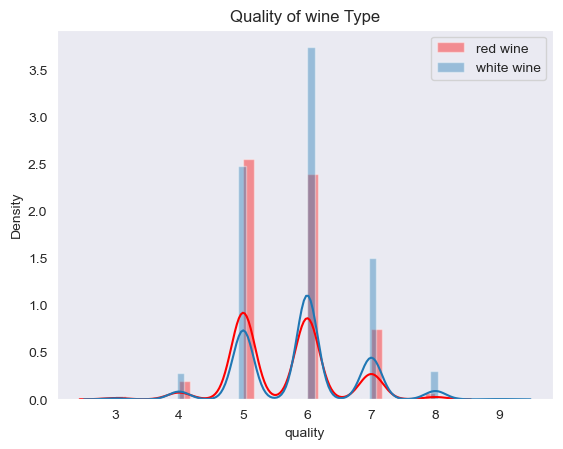

In [124]:
#커널 밀도 추정을 적용한 히스토그램 그리기
sns.set_style('dark')  #히스토그램 차트의 배경색 스타일을 설정
sns.distplot(red_wine_quality, kde = True, color = 'red', label = 'red wine')  #레드 와인에 대한 distplot 객페를 생성
sns.distplot(white_wine_quality, kde = True, label = 'white wine')  #화이트 와인에 대한 distplot 객페를 생성
plt.title("Quality of wine Type")  #차트 제목을 설정한다.
plt.legend()  #차트 범례를 설정한다.
plt.show  #설정한 내용대로 치트를 표시한다.

In [125]:
#부분 회귀 플롯으로 시각화하기
import statsmodels.api as sm

eval_env: 1


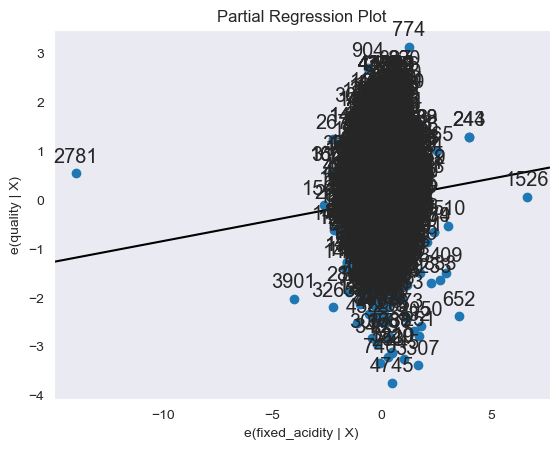

In [128]:
#fixed_acidity가 종속 변수 quality에 미치는 영향력을 시각화
#부분 회쉬에 사용한 독립 변수와 종속 변수를 제외한 나머지 변수 이름을 리스트 others로 추출한다.
others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))
#나머지 변수는 고정하고 fixed_acidity가 종속 변수 quality에 미치는 영향에 부분 회귀 수행
p, resids = sm.graphics.plot_partregress("quality", "fixed_acidity", others, data = wine, ret_coords = True)
plt.show()  #부분 회귀의 결과를 플롯으로 시각화하여 나타냄

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

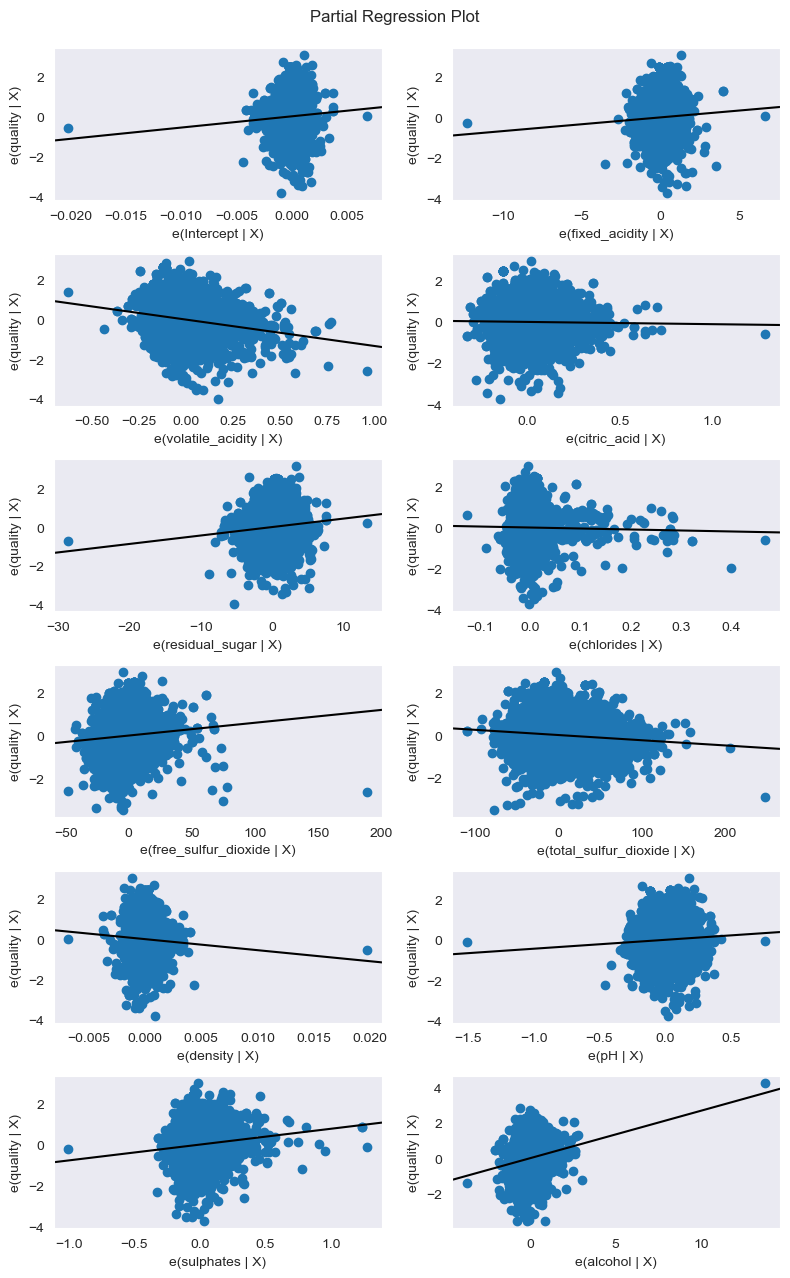

In [129]:
#각 독립 변수가 종속 변수 quality에 미치는 영향력을 시각화
fig = plt.figure(figsize = (8, 13))  #차트의 크기 지정
#다중 선형 회귀 분석 결과를 가지고있는 regression_result를 이용 각 독랍 변수의 부분 회귀 플롯을 구하기
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show  #부분 회귀 결과를 플롯으로 시각화하여 나타냄

# 2. 상관 분석 + 히트맵_타이타닉호 생존율 분석하기 

In [155]:
#1. 데이터 수집
import seaborn as sns
import pandas as pd

In [156]:
titanic = sns.load_dataset("titanic")  #titanic 데이터 로드

In [189]:
titanic.to_csv('C:/Users/rou59/주피터노트북/titanic.csv', index = False)  #titanic데이터를 csv 파일로 저장

In [158]:
#2. 데이터 준비
titanic.isnull().sum()  #결측값 확인 -> 실행결과 age, embarked, deck, embark_town에 결측값 발견

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [159]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())  #age 열의 결측값을 중앙값으로 치환

In [160]:
titanic['embarked'].value_counts()  #embarked 열에서 최빈값 확인

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [161]:
titanic['embarked'] = titanic['embarked'].fillna('S')  #결측값을 S로 치환

In [162]:
titanic['embark_town'].value_counts()  #embark_town 열에서 최빈값 확인

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [163]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')  #결측값을 Southampton로 치환

In [164]:
titanic['deck'].value_counts()  #deck 열에서 최빈값 확인

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [165]:
titanic['deck'] =titanic['deck'].fillna('C')  #결측값을 C로 치환

In [166]:
titanic.isnull().sum()  #데이터에 결측값이 다 채워졌는지 확인

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [167]:
#3. 데이터 탐색
#데이터의 기본 정보 탐색하기
titanic.info()  #데이터의 기본 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [168]:
titanic.survived.value_counts()  #survived 속성값의 빈도 확인(survived는 생존 여부를 1과 0으로 alive는 생존 여부를 yes와 no로)

0    549
1    342
Name: survived, dtype: int64

In [169]:
#차트를 그려 데이터를 시각적으로 탐색하기
import matplotlib.pyplot as plt

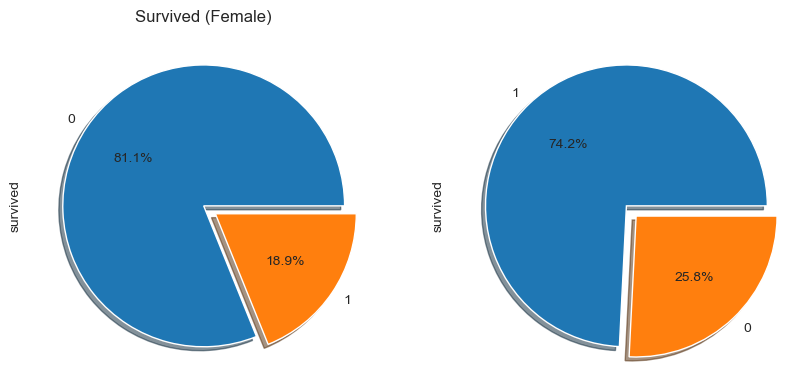

In [170]:
f,ax = plt.subplots(1, 2, figsize = (10, 5))  #한 줄에 두 개의 차트
#첫 번째 pie차트는 남자 승객의 생존율을 나타내도록 설정
titanic['survived'][titanic['sex']  == 'male'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
#첫 번째 pie차트는 여자 승객의 생존율을 나타내도록 설정
titanic['survived'][titanic['sex']  == 'female'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')  #첫 번째 차트 제목 설정
ax[0].set_title('Survived (Female)')  #두 번째 차트 제목 설정
plt.show()  #차트 출력 = 남자 승객의 생존율은 18.9%, 여자 승객의 생존율은 74.2%

In [176]:
#등급별 생존자 수를 차트로 나타내기
sns.countplot('pclass', hue = 'survived', data = titanic)  #pclass유형을 x축 survived유형을 y축으로 설정
plt.title('Pclass vs Survived')
plt.show()  #차트 출력 = 생존자는 1등급에서 가장 많고 사망자는 3등급에서 가장 많음

TypeError: countplot() got multiple values for argument 'data'

In [178]:
#4. 데이터 모델링
titanic_corr = titanic.corr(method = 'pearson')  #피어슨 상관 계수를 적용하여 상관 계수 구한다.
titanic_corr  #상관 계수 출력

C:\Users\rou59\AppData\Local\Temp\ipykernel_6448\2359478460.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_corr = titanic.corr(method = 'pearson')


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [188]:
titanic_corr.to_csv('C:/Users/rou59/주피터노트북/titanic_corr.csv', index = False)  #상관 계수를 csv파일로 저장

In [180]:
#특정 변수 사이의 상관 계수 구하기
titanic['survived'].corr(titanic['adult_male'])  #adult_male 변수 사이의 상관 계수 구하기

-0.5570800422053258

In [181]:
titanic['survived'].corr(titanic['fare'])  #fare 변수 사이의 상관 계수 구하기

0.25730652238496227

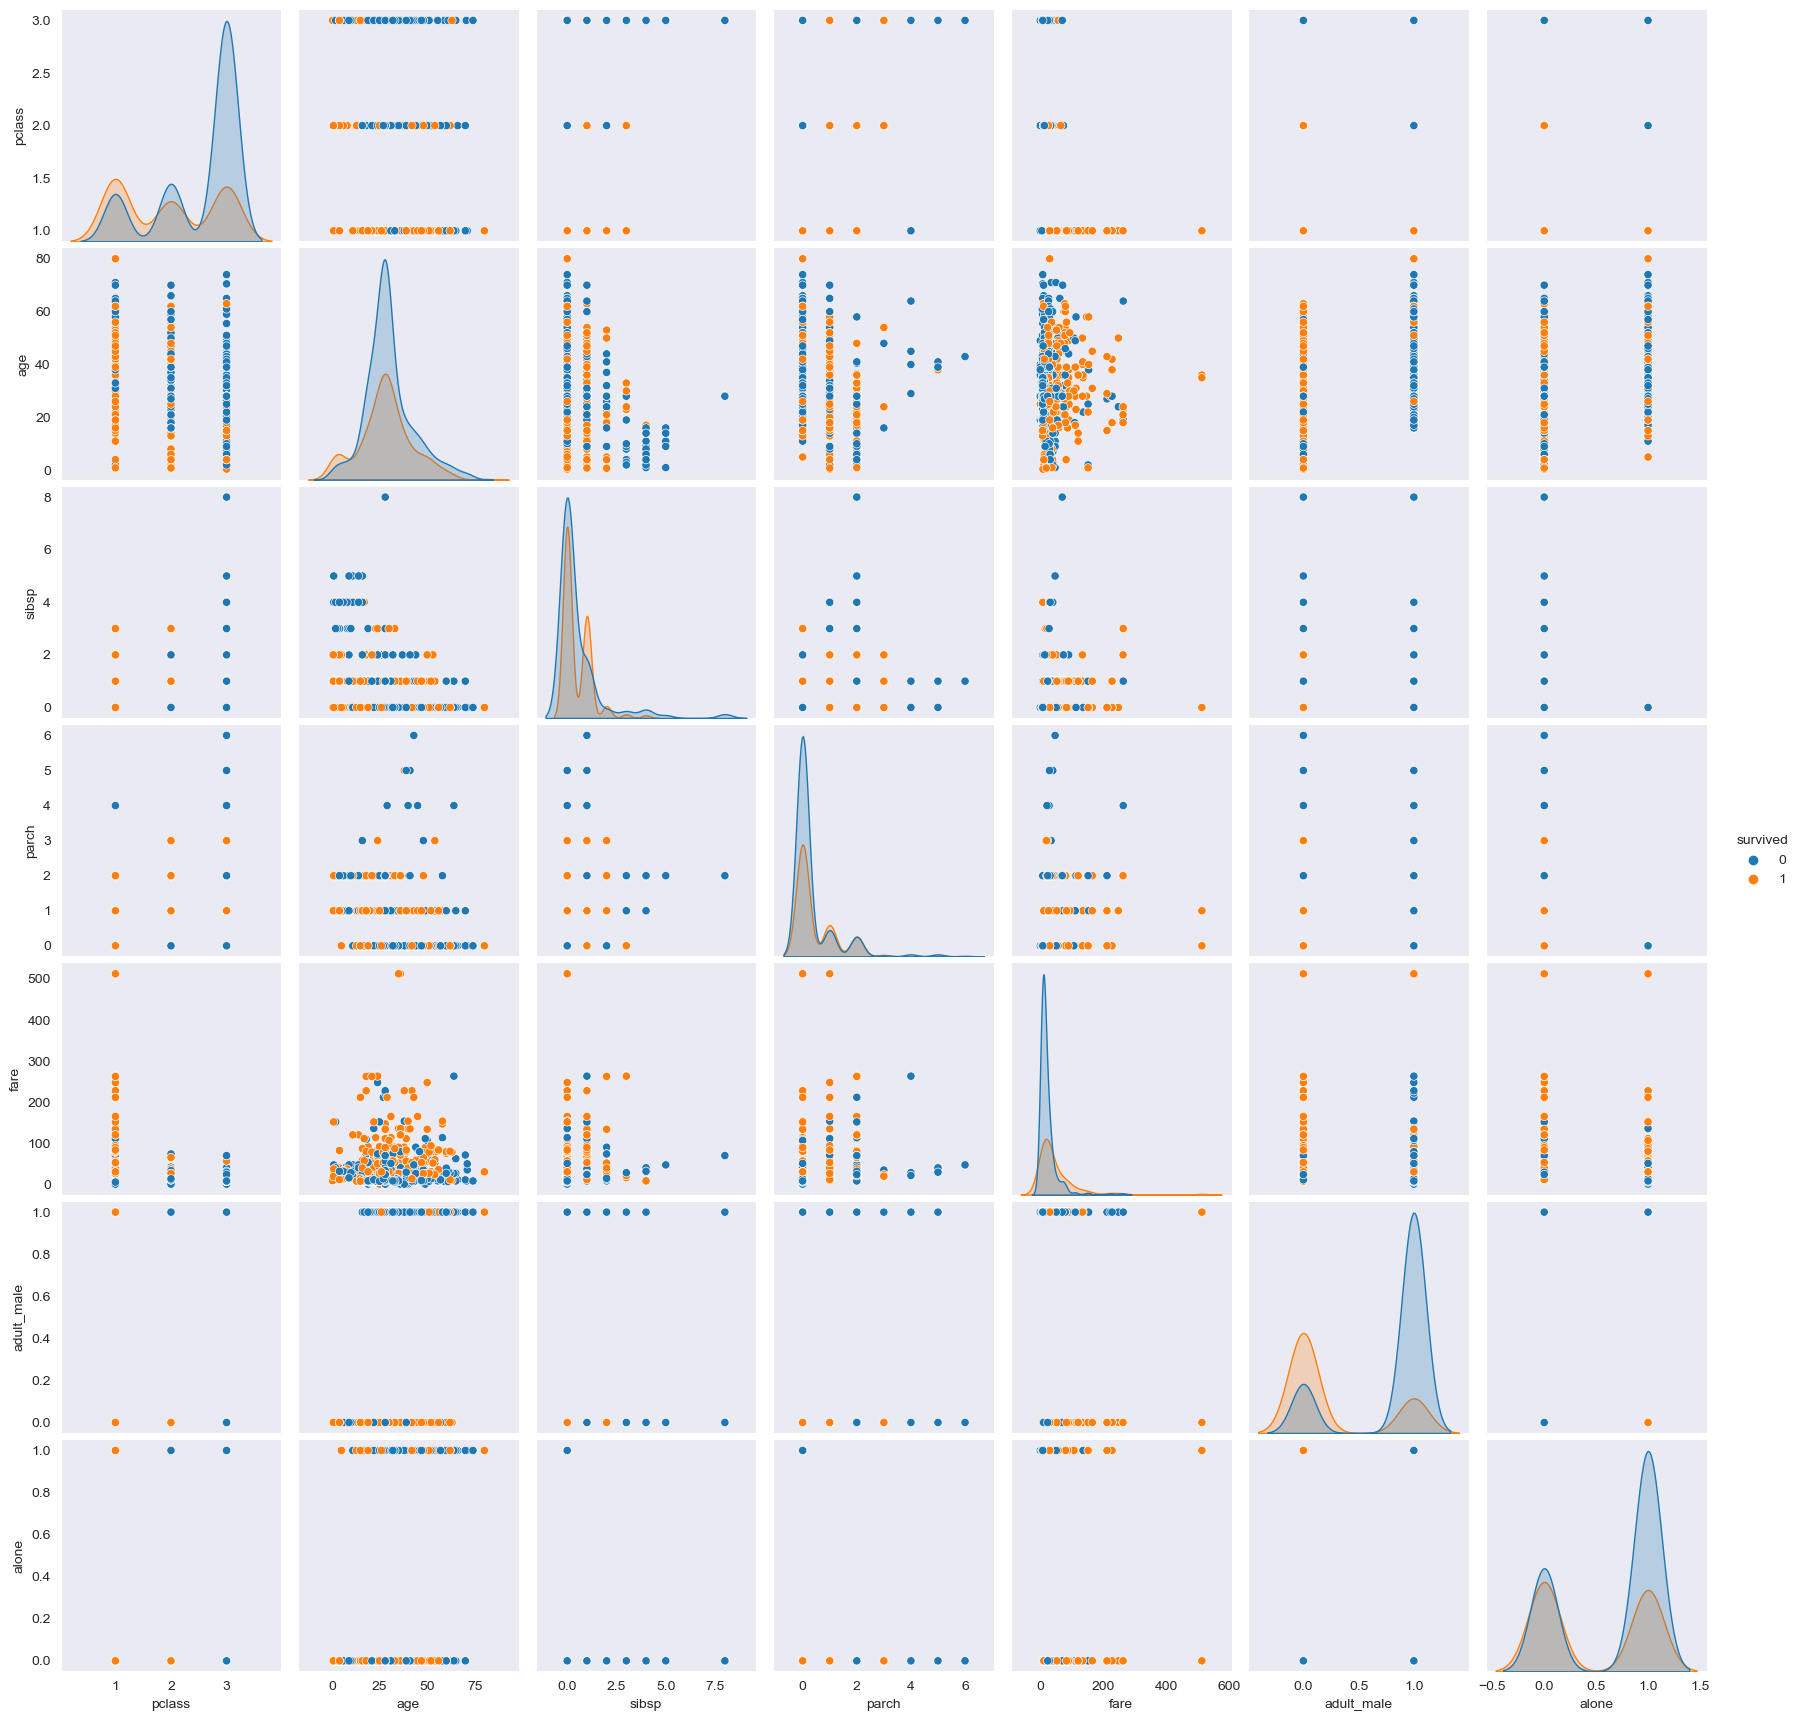

In [183]:
#5. 결과 시각화
#산점도로 상관 분석 시각화하기
sns.pairplot(titanic, hue = 'survived')  #pairplot 함수를 사용하여 타이타닉 데이터의 차트 그리기
plt.show()  #pairplot 출력

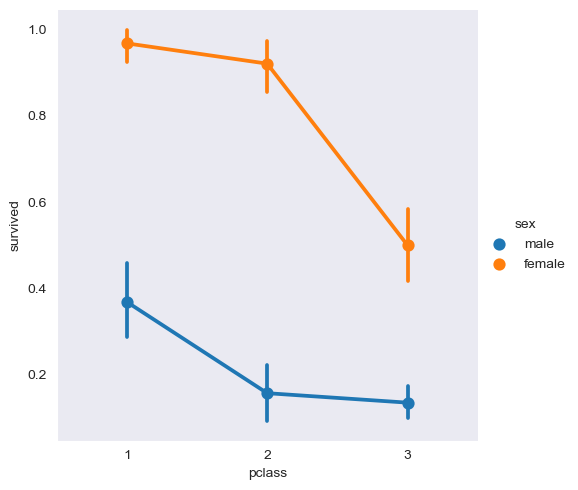

In [184]:
#두 변수의 상관관계 시각화하기
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')
plt.show()

In [185]:
#두 변수 사이의 상관 계수를 히트맵으로 시각화하기
#10살 단위로 등급을 나누어 0~7의 값으로 바꿔주는 caregory_age 함수를 작성
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 7
    else:
        return 7
titanic['age2'] = titanic['age'].apply(category_age)  #새로운 age2 열을 만들어 추가한다. 

In [186]:
titanic['sex'] = titanic['sex'].map({'male':1, 'famale':0})  #성별을 남성은 1 여성은 0으로 치환

In [187]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1  #가족의 수를 구하여 family열 추가

In [190]:
titanic.to_csv('C:/Users/rou59/주피터노트북/titanic3.csv', index = False)  #titanic3.csv로 수정된 데이터 프레임 저장

In [191]:
#상관분석 결과를 히트맵으로 나타내기
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]  #히트맵에 사용할 데이터를 추출

In [192]:
colormap = plt.cm.RdBu  #히트맵에 사용할 색상맵을 지정

<function matplotlib.pyplot.show(close=None, block=None)>

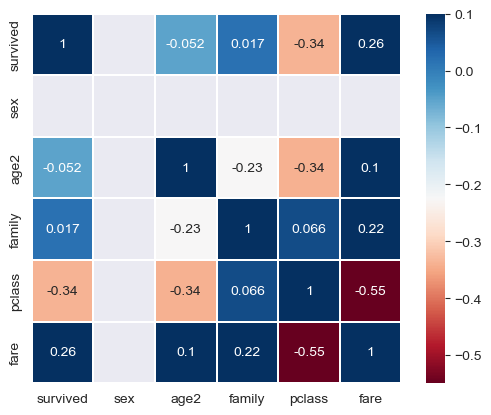

In [193]:
#corr() 함수로 구한 상관 계수로 히트맵 생성
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 0.1, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {"size": 10})
plt.show  #생성한 히트맵 출력